In [ ]:
%matplotlib notebook

In [ ]:
%matplotlib inline

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from matplotlib.dates import DateFormatter



# Import API key
from config2 import weather_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_keys
city_weather =[]

for x in cities:
    query_url = url + "&q=" + x
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()        
    print(json.dumps(weather_json, indent=4, sort_keys=True))
    try: 

        weather_dict = {
             'City': x,
             'Lat':weather_json['coord']['lat'],
             'Lng':weather_json['coord']['lon'],
             'Max_Temp':weather_json['main']['temp_max'],
             'Humidity':weather_json['main']['humidity'],
             'Cloudness':weather_json['clouds']['all'],
             'WindSpeed':weather_json['wind']['speed'],
             'Country':weather_json['sys']['country'],
             'Date':weather_json['dt']

                    }
        city_weather.append(weather_dict)

    except Exception:
        print("City not found!")
    
    
    
print(city_weather)

In [ ]:
# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=4, sort_keys=True))

In [ ]:
#weather_json["wind"]["speed"]

# Converting Raw Data to DataFrame¶

In [ ]:
city_weather_pd = pd.DataFrame(city_weather)
city_weather_pd.head()

In [ ]:
city_weather_pd.shape

In [ ]:
#Exporting the city data into a .csv.
city_weather_pd.to_csv("weather_json.csv")

In [ ]:
#Displaying city data from csv file

city_weather_complete = pd.read_csv("weather_json.csv", index_col=0)

In [ ]:
city_weather_complete.head()

In [ ]:
#Inspect the data and remove the cities where the humidity > 100%.

humidity_df = city_weather_complete.describe(include = "all")

In [14]:
humidity_df.drop(['City','Country'], axis=1, inplace=True)

In [15]:
humidity_df.drop(['unique','top', 'freq'], axis=0, inplace=True)

In [16]:
humidity_df

,Lat,Lng,Max_Temp,Humidity,Cloudness,WindSpeed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,21.227982,18.695386,69.561876,69.775956,56.154827,7.912077,1.657951e+09
std,33.500220,91.060727,13.778356,20.516837,38.116749,5.503699,6.269570e+01
min,-54.800000,-175.200000,22.750000,1.000000,0.000000,0.000000,1.657950e+09
25%,-6.216700,-66.865400,60.670000,56.000000,20.000000,3.690000,1.657951e+09
50%,26.914700,23.029700,70.750000,73.000000,65.000000,6.910000,1.657951e+09
75%,50.316700,101.648300,79.300000,87.000000,96.000000,11.180000,1.657951e+09
max,78.218600,179.316700,108.680000,100.000000,100.000000,26.930000,1.657951e+09


# Plotting the Data

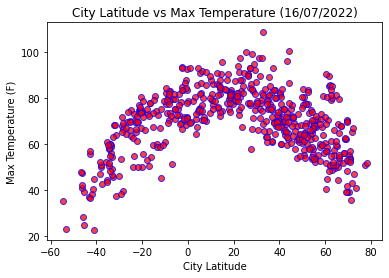

In [17]:
# Latitude vs. Temperature Plot
today = time.strftime("%d/%m/%Y")
city_lat = city_weather_complete['Lat']
max_temp = city_weather_complete['Max_Temp']
plt.scatter(city_lat, max_temp, marker= "o", color="red", alpha=0.75,edgecolors="blue")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.savefig('lat_vs_temp.png')
plt.show()

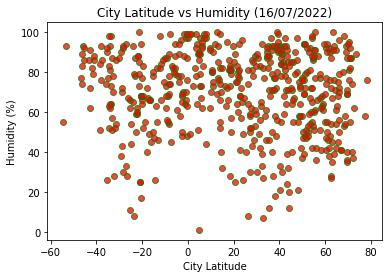

In [18]:
#Latitude vs. Humidity Plot
today = time.strftime("%d/%m/%Y")
city_lat = city_weather_complete['Lat']
humidity = city_weather_complete['Humidity']
plt.scatter(city_lat, humidity, marker= "o", color="red", alpha=0.75,edgecolors="green")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({today})")
plt.savefig('lat_vs_hum.png')
plt.show()

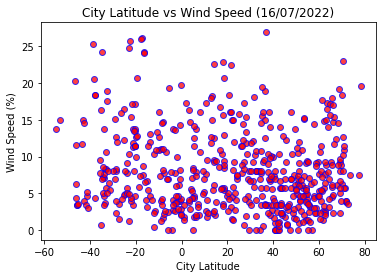

In [19]:
# Latitude vs. Wind Speed Plot
today = time.strftime("%d/%m/%Y")
city_lat = city_weather_complete['Lat']
wind_speed = city_weather_complete['WindSpeed']
plt.scatter(city_lat, wind_speed, marker= "o", color="red", alpha=0.75,edgecolors="blue")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (%)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.savefig('lat_vs_wind.png')
plt.show()

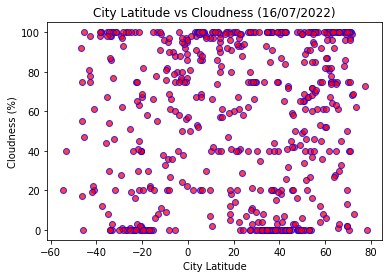

In [20]:
# Latitude vs. Cloudiness Plot
today = time.strftime("%d/%m/%Y")
city_lat = city_weather_complete['Lat']
cloudness = city_weather_complete['Cloudness']
plt.scatter(city_lat, cloudness, marker= "o", color="red", alpha=0.75,edgecolors="blue")
plt.xlabel("City Latitude")
plt.ylabel("Cloudness (%)")
plt.title(f"City Latitude vs Cloudness ({today})")
plt.savefig('lat_vs_cloud.png')
plt.show()

# Linear Regression

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
# Calculating the number of Cities in the Northern Hemisphere
northern_hemisphere_df = city_weather_complete.loc[city_weather_complete["Lat"] > 0]
northern_cities_count = len(northern_hemisphere_df)

In [22]:
northern_cities_count

380

The r-value is: -0.6344053230410134


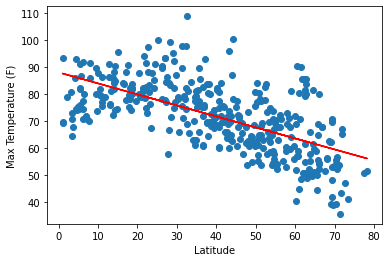

In [23]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.savefig('nrth_hemisphere- lat_vs_max_tem.png')
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
# Calculating the number of Cities in the Southern Hemisphere 
southern_hemisphere_df = city_weather_complete.loc[city_weather_complete["Lat"] < 0]
southern_cities_count = len(southern_hemisphere_df)

In [25]:
southern_cities_count

169

The r-value is: 0.780252150457748


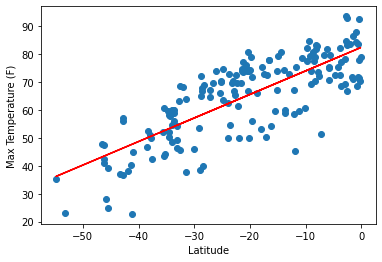

In [26]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.savefig('sthn_hemisphere- lat_vs_max_tem.png')
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.12994401980509038


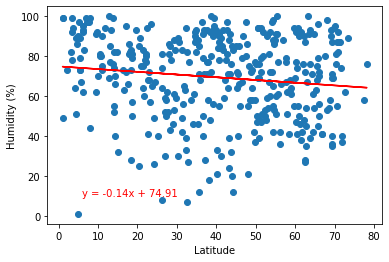

In [27]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('nrth_hemisphere- hum_vs_lat.png')
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.001967370141238145


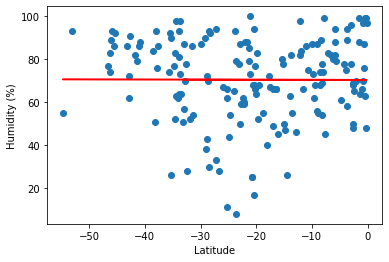

In [28]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('sthn_hemisphere- lat_vs_hum.png')
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.034534388187831985


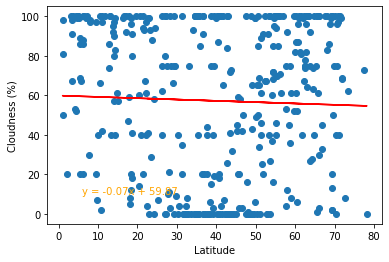

In [29]:
#Northern Hemisphere - Cloudness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="orange")
plt.xlabel('Latitude')
plt.ylabel('Cloudness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('nrth_hemisphere- cldness_vs_lat.png')
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07337099030616373


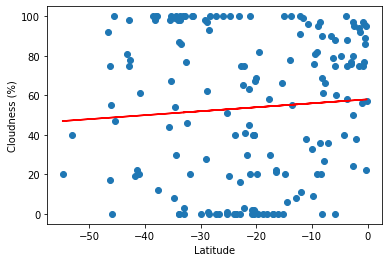

In [30]:
#Southern Hemisphere - Cloudness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('sthn_hemisphere- lat_vs_cldness.png')
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.046950941894510136


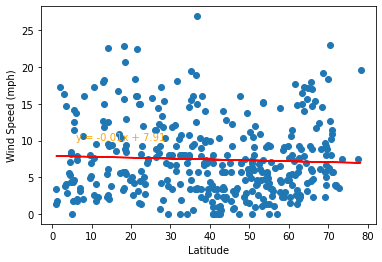

In [31]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="orange")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig('nrth_hemisphere- windsp_vs_lat.png')
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16556215622189774


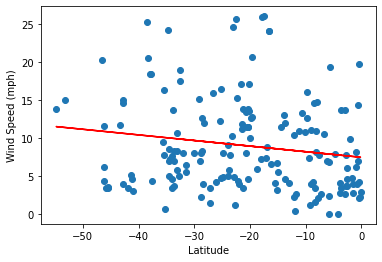

In [32]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig('sthn_hemisphere- lat_vs_windsp.png')
plt.show()